TODO:
- Modificar markdowns para redacción en 3ra persona.
- Finalizar la creación de nuevos markdowns.
- Reformatear markdowns para tener presentación de informe.

IMPORTANTE: AL GENERAR EL PCA DEBEN CONSIDERARSE LAS VARIABLES PREDICTORAS, NO EL OBJETIVO (CLASS)

<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Tomás Fontecilla </em><br>

</div>

# Machine Learning: Laboratorio 01
*07 de Septiembre de 2024*

**Nombre Estudiante(s)**: `Gabriel Álvarez - Jaime Castillo - Kurt Castro - Giuseppe Lavarello`  

#### Laboratorio 1 - Machine Learning

**Objetivo**: En este laboratorio deberá investigar del uso de la librería python scikit-learn y sus funciones más útiles. Su
meta es realizar un análisis de datos, PCA y posterior clasficador utilizando el algoritmo Naive Bayes.
Para esto, utilizará la base Wine que puede descargar desde 'https://archive.ics.uci.edu/ml/datasets/Wine' o bien utilizar
la que se encuentra en la librería scikit-learn bajo el nombre de load_wine.

Se le evaluará por:

- Importe la libería Scikit-learn de forma correcta. Importe otras liberías que consideraría útiles para su análisis y
comente por qué las usará. Cargue los datos.
- Exploración de datos. Muestre información que considere relevante y explique brevemente por qué considera que lo es.
- Selección de muestras. Explique cómo tomó las muestras para su análisis brevemente y qué hiperparámetros utilizó.
- Ejecute el clasficador. Muestre sus resultados, argumente sobre el modelo. Argumente por qué hizo o dejó de hacer
fine-tunning
- Concluya.

#### Carga de Librerías
Las librerías que se utilizarán en este laboratorio son las siguientes:
- pandas: Se utiliza la librería pandas para la manipulación de datos.
- matplotlib: Se utiliza la librería matplotlib para la visualización de datos.
- seaborn: Se utiliza la librería seaborn para generar gráficos específicos, como pairplot y heatmap.
- StandardScaler de sklearn.preprocessing: Se utiliza para estandarizar los datos y no tener problemas con la escala de los mismos.
- PCA de sklearn.decomposition: Se utiliza para determinar las componentes principales de los datos y reducir su dimensionalidad.
- GaussianNB de sklearn.naive_bayes: Se utiliza para implementar el modelo de clasificación Naive Bayes.
- train_test_split de sklearn.model_selection: Se utiliza para dividir los datos en conjuntos de entrenamiento y prueba.
- precision_score, recall_score, f1_score, accuracy_score y confusion_matrix de sklearn.metrics: Se utilizan para evaluar el modelo de clasificación.

In [6]:
# Moví todos los import al principio. Es buena práctica porque permite mantener el código más ordenado y facilita la lectura.

# Para manipulación de datos 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Para visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt

# Para clasificacion
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

In [7]:
# Realizaremos la carga de wine.csv y le asignaremos nombre a cada columna, ya que el dataset viene por defecto sin sus encabezados

wine = pd.read_csv("Wine.csv", header=None)

wine.columns = ["class", "alcohol", "malic_acid", "ash", "alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
                "proanthocyanins", "color_intensity", "hue", "od280/od315_of_diluted_wines", "proline"]

#### Exploración de Datos

In [8]:
# Vista general de la estructura del dataset

wine.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
# Contaremos la cantidad de filas por cada categoría "class"

wine["class"].value_counts()

class
2    71
1    59
3    48
Name: count, dtype: int64

In [10]:
# Información general del dataset
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  od280/od315_of_diluted_wines  178 non-null    float64
 13  proli

Información General del Dataset:
- En total el dataset tiene 178 registros y 14 columnas.  
- El dataset no contiene registros faltantes, por lo que no es necesario realizar imputación de datos.  
- Todas las columnas del dataset son numéricas.

In [11]:
# Estadísticas básicas del dataset

wine.describe()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


A continuación, se mostrará un pairplot, para ver el comportamiento de las diferentes variables del dataset respecto a otra:

<function matplotlib.pyplot.show(close=None, block=None)>

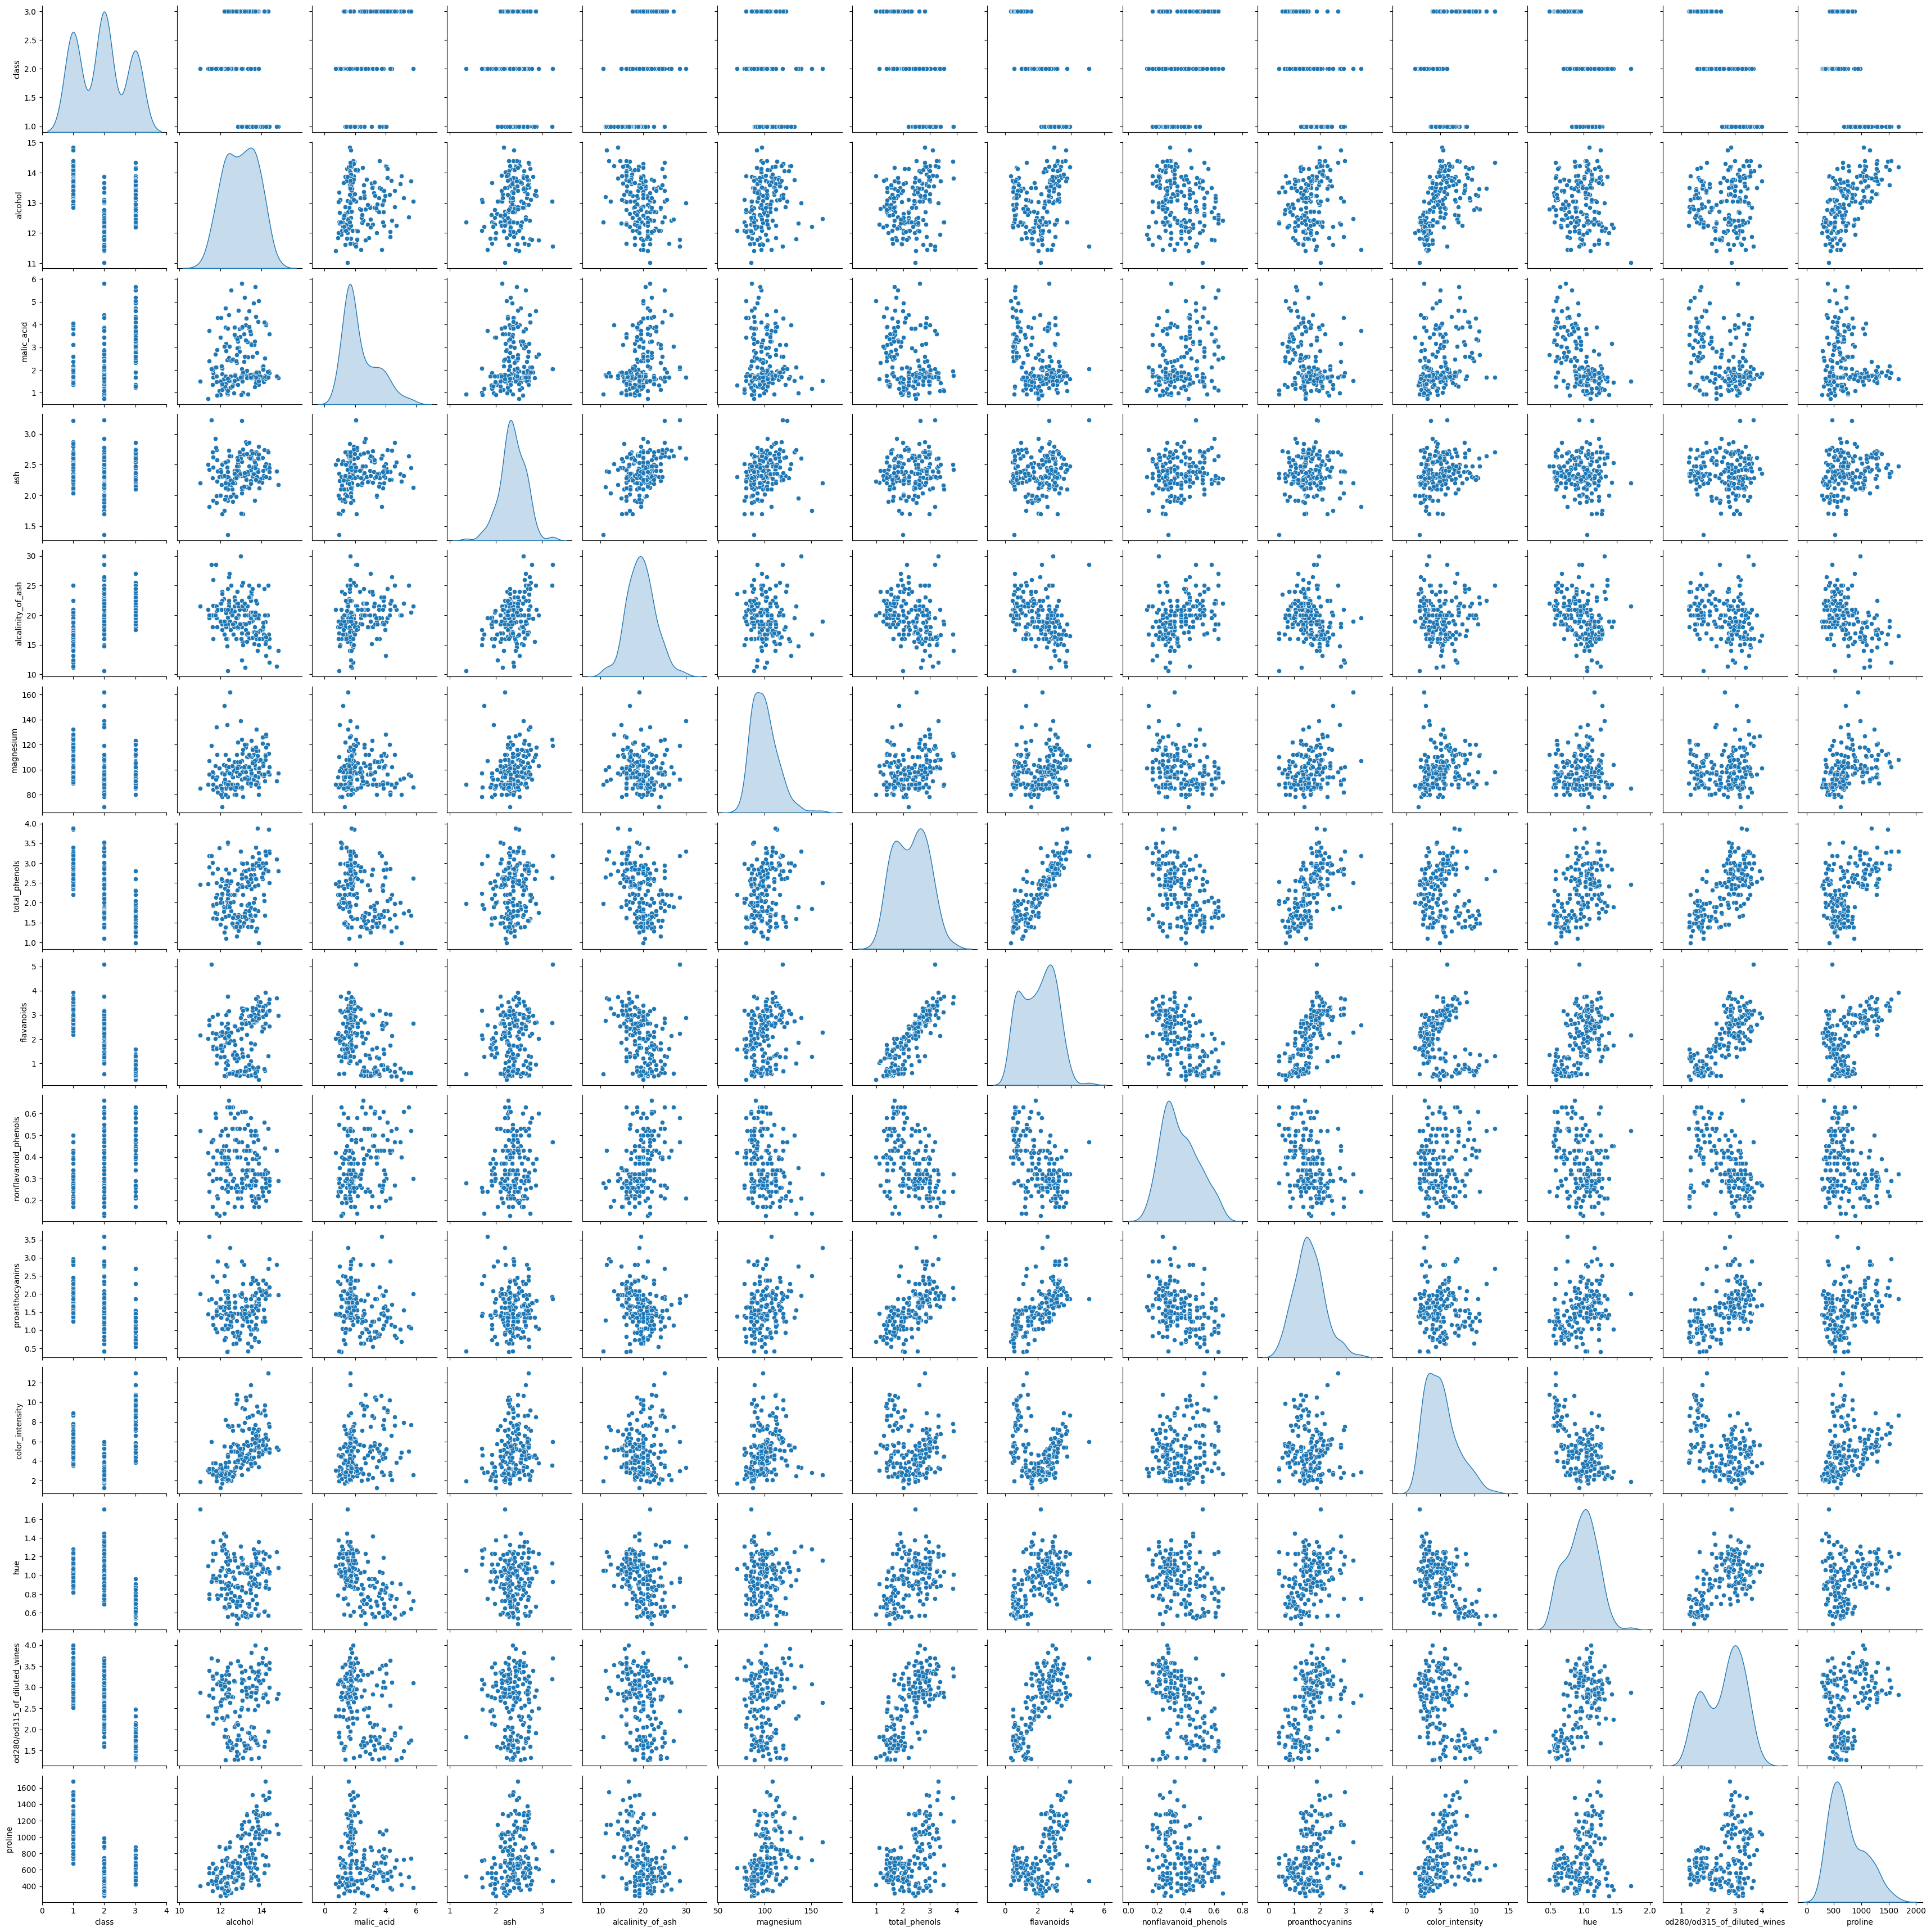

In [12]:
# sns.pairplot(wine, diag_kind="kde", hue="class", palette="pastel" ,markers=["o", "s", "D"])
sns.pairplot(wine, diag_kind='kde')
plt.show

Del gráfico de variables cruzadas (pairplot) se puede observar que algunas variables pueden presentar relaciones lineales. Esto puede indicar que existe dependencia entre algunas variables. Por lo tanto, se puede reducir la dimensionalidad de los datos dejando las variable más significativas y que puedan explicar la mayor cantidad de varianza. Para ello se realiza un análisis de componentes principales (PCA) para determinar qué variables deben ser consideradas para el modelo.

Primeramente, se normaliza el dataset para que todas las variables tengan media 0 y varianza 1 en la variable **wine_standarized**. Esto es necesario para que todas las variables tengan el mismo peso al explicar la varianza y no sea dominada por variables con mayor escala.

In [13]:
wine_features = wine.drop("class", axis=1)

wine_standarized = StandardScaler(with_std=True,with_mean=True).fit_transform(wine_features)
pd.DataFrame(wine_standarized, columns = wine_features.columns).head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


Para realizar el Análisis de Componentes Principales (PCA) se utilizará la clase PCA de la librería scikit-learn. Para ello, se aplica el método .fit_transform al set de datos estandarizado, se obtiene el ratio de varianza explicada por cada componente y luego se realiza un gráfico de la varianza explicada acumulada para determinar cuántos componentes se deben conservar.

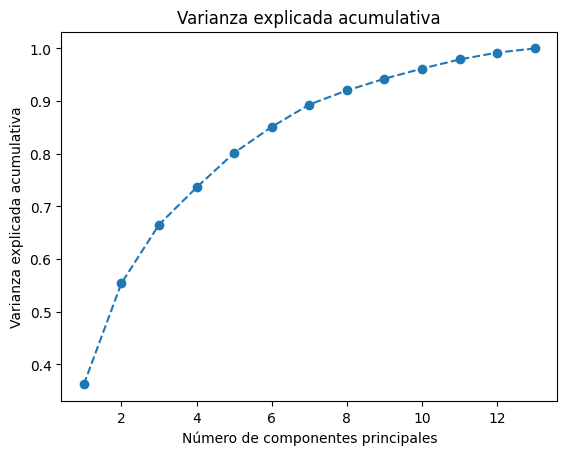

In [14]:
# Se crea un objeto de la clase PCA
pca = PCA()

# Aplicar PCA a tus datos estandarizados
principal_components = pca.fit_transform(wine_standarized)

# Explorar la varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Visualizar la varianza explicada acumulativa para decidir cuántos componentes conservar
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Varianza explicada acumulativa')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulativa')
plt.show()

Como se observa en el gráfico anterior, la varianza es explicada aproximadamente en un 40% por el primer componente, mientras que cerca de un 70% de esta es explicada por los tres primeros. Para este caso, para evitar una gran pérdida de información al realizar una reducción de dimensionalidad, se conservarán ocho componentes, ya que estos aportan a la explicación de aproximadamente un 92.02% de la varianza.

In [17]:
n_components = 8
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(wine_standarized)

# Ahora tienes tus datos reducidos a n_components características
pc_df=pd.DataFrame(principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])
print(f'Porcentaje de varianza explicada por los primeros {n_components} componentes principales: {pca.explained_variance_ratio_.sum()*100:.2f}%')

Porcentaje de varianza explicada por los primeros 8 componentes principales: 92.02%


Se realiza un nuevo pairplot para visualizar el comportamiento de los componentes principales entre sí.

<function matplotlib.pyplot.show(close=None, block=None)>

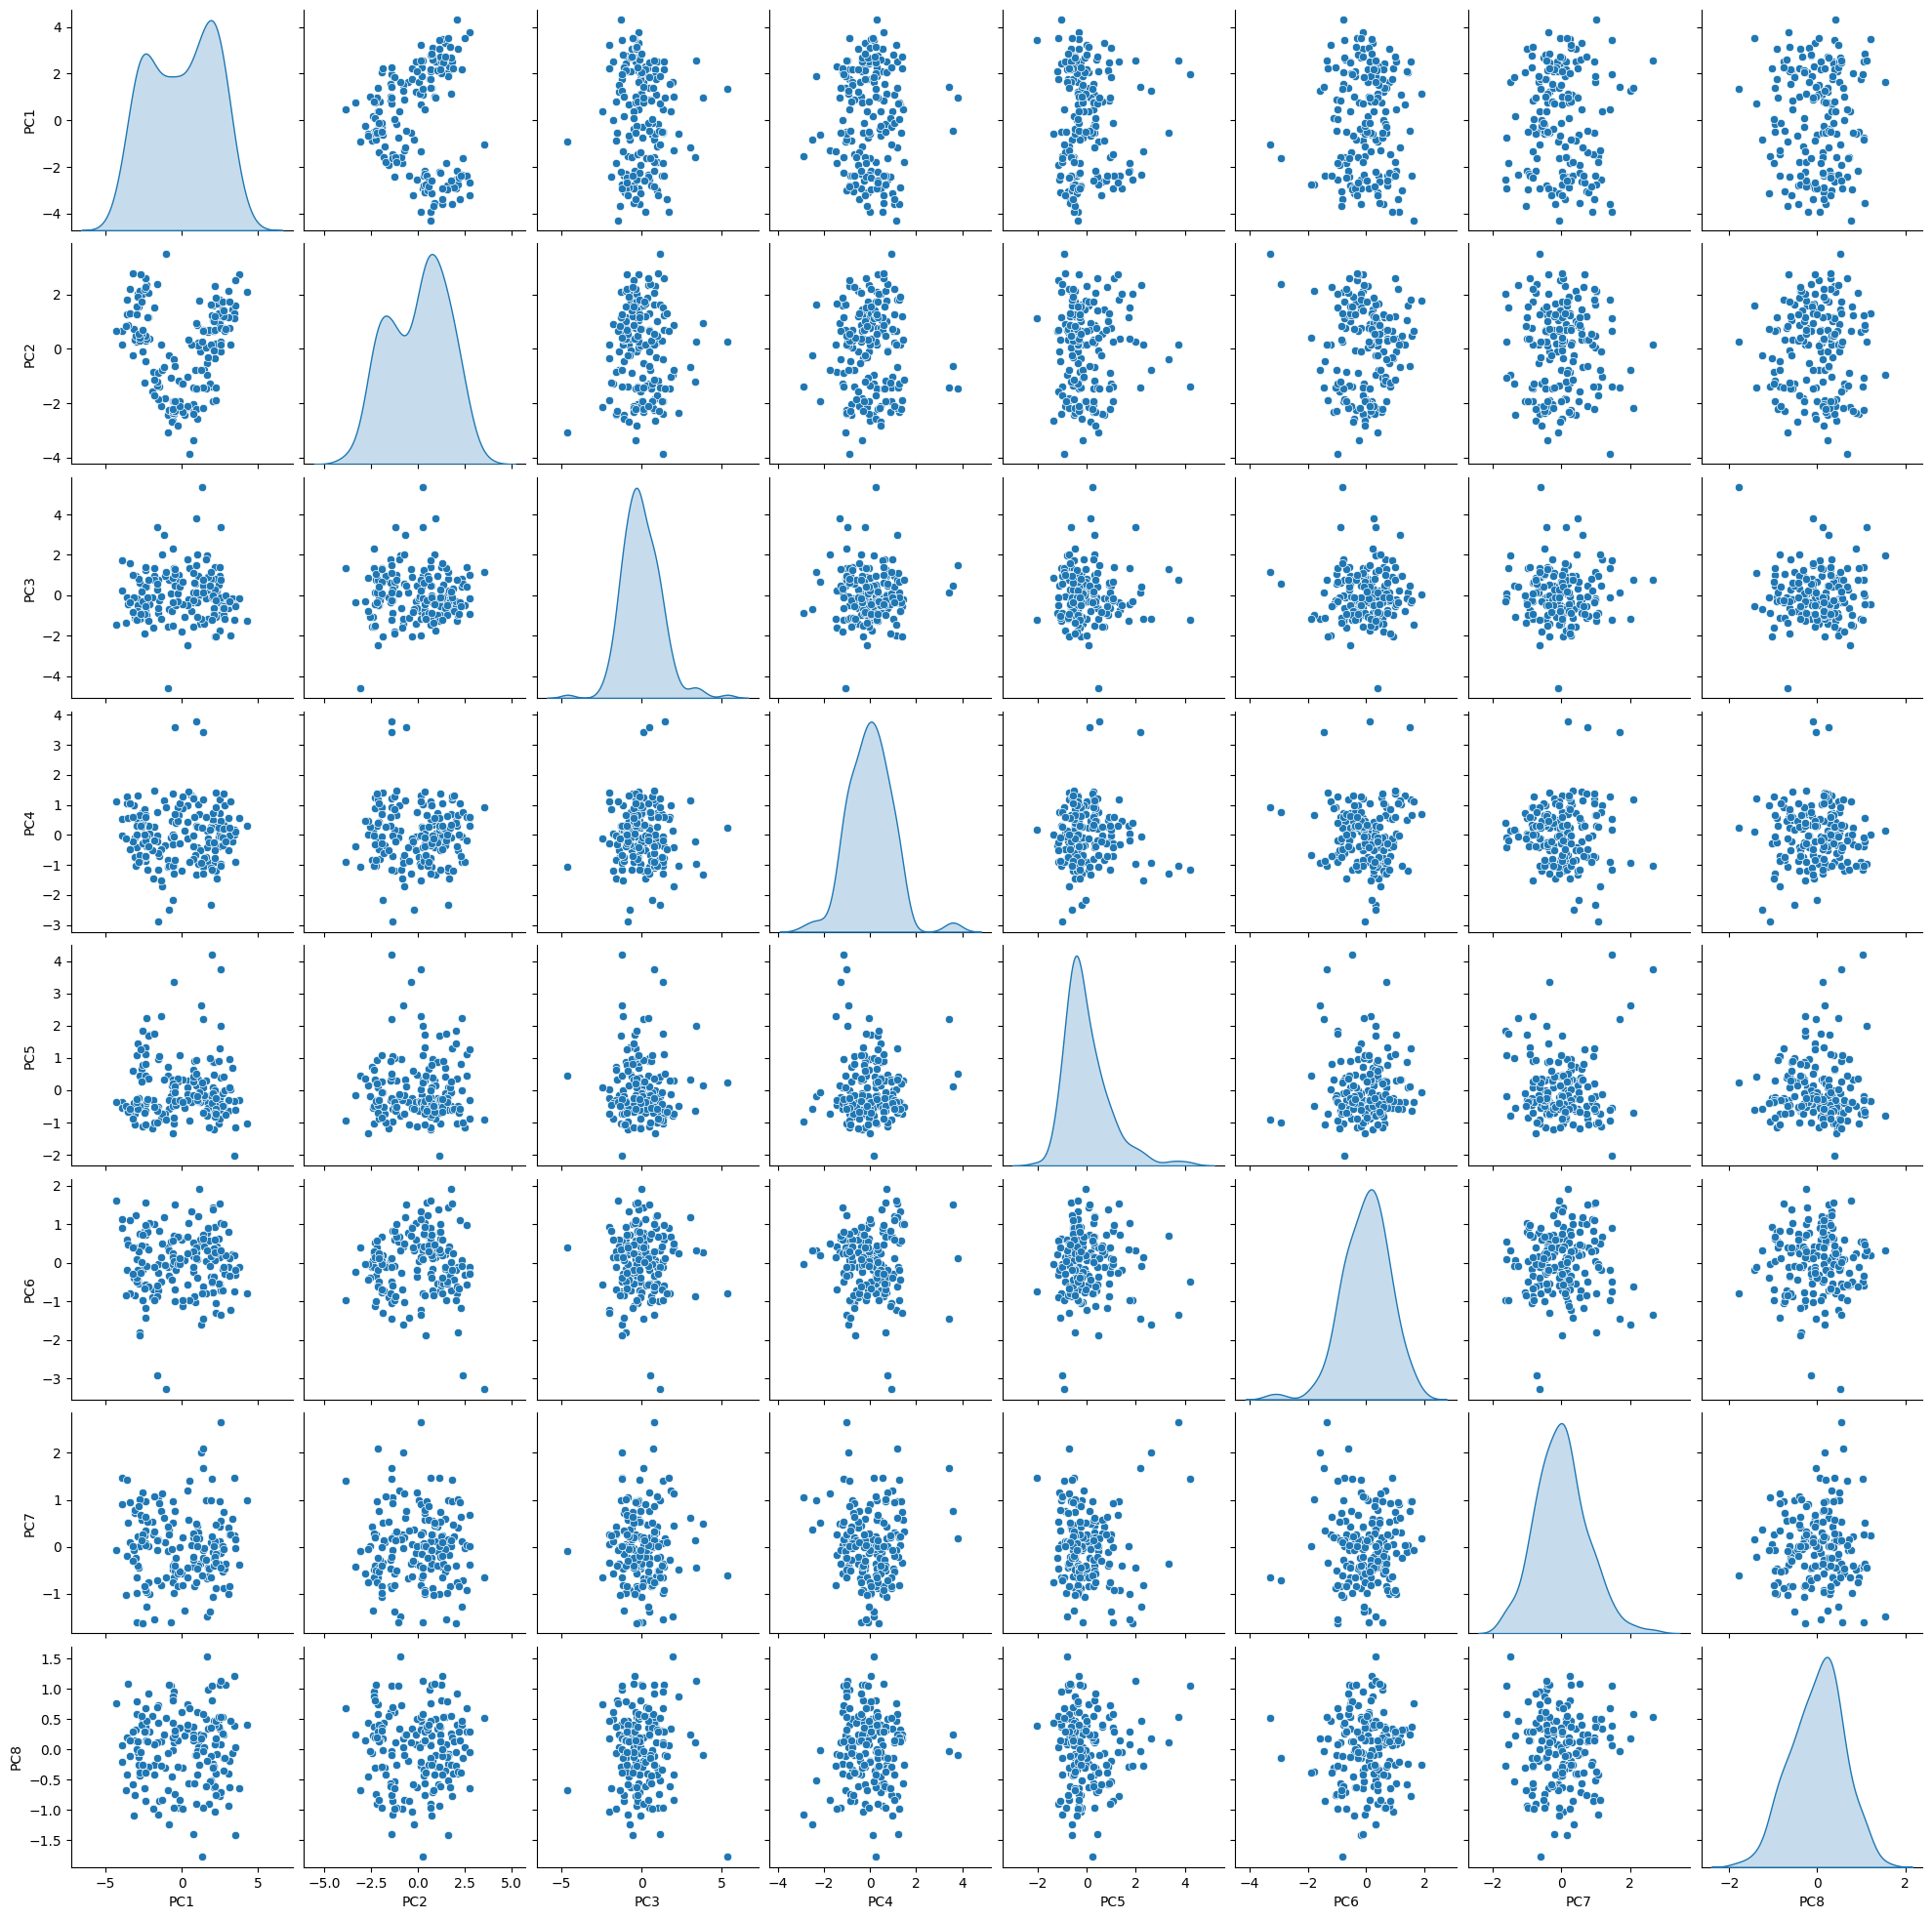

In [18]:
sns.pairplot(pc_df, diag_kind="kde")
plt.show

Del gráfico anterior podemos visualizar a simple vista que no existen relaciones lineales entre los componentes principales elegidos.

A continuación, se realiza un análisis de la composición de los componentes principales generados para poder determinar cuánto aporta cada variable a cada uno de ellos.

In [20]:
# Crear un DataFrame con las cargas de cada variable en cada componente principal
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, n_components + 1)], index=wine_features.columns)

#Importancia de las variables
loadings_abs = loadings.abs()

# Mostrar las 5 variables con las cargas más altas para cada componente principal
top_loadings = loadings_abs.apply(lambda x: x.nlargest(5).index)

# Mostrar las cargas
print("Cargas de variables en cada componente principal:")
print(top_loadings)

Cargas de variables en cada componente principal:
                            PC1              PC2  \
0                    flavanoids  color_intensity   
1                 total_phenols          alcohol   
2  od280/od315_of_diluted_wines          proline   
3               proanthocyanins              ash   
4          nonflavanoid_phenols        magnesium   

                            PC3              PC4                   PC5  \
0                           ash       malic_acid             magnesium   
1             alcalinity_of_ash              hue  nonflavanoid_phenols   
2                       alcohol  proanthocyanins               alcohol   
3          nonflavanoid_phenols        magnesium                   hue   
4  od280/od315_of_diluted_wines          proline               proline   

                            PC6                   PC7                PC8  
0                    malic_acid  nonflavanoid_phenols                hue  
1               proanthocyanins           

Para un mejor entendimiento, se generan gráficos de barras horizontales para visualizar el aporte de cada variable a los componentes principales.

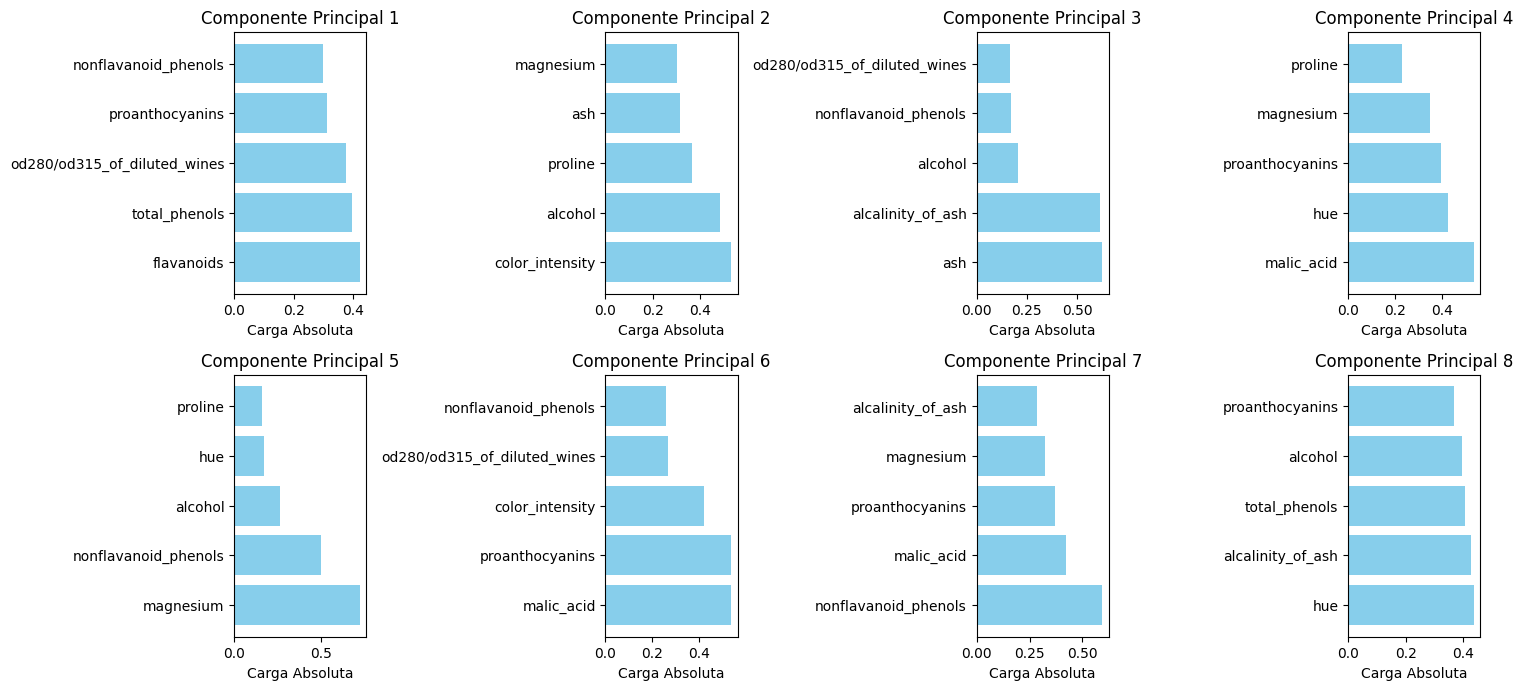

In [21]:
plt.figure(figsize=(15, 10))

for i in range(n_components):
    plt.subplot(3, 4, i + 1) #grafico de 3 filas y 3 columnas para visualizar cada componente
    top_vars = top_loadings[f'PC{i+1}'] #muestra los variables con mayor importancia para cada componente
    loading_values = loadings_abs[f'PC{i+1}'][top_vars]
    plt.barh(top_vars, loading_values, color='skyblue')
    plt.xlabel('Carga Absoluta')
    plt.title(f'Componente Principal {i+1}')

plt.tight_layout()
plt.show()

# Todo este análisis tiene que cambiar porque quedó fuera la variable "class"
- **Componente Principal 1**:

Las variables más influyentes son class, flavanoids, total_phenols, od280/od315_of_diluted_wines, y proanthocyanins.
Estas variables tienen una alta carga absoluta, lo que indica que tienen una gran influencia en la definición de este primer componente.
- **Componente Principal 2**:

Las variables color_intensity, alcohol, proline, ash, y magnesium son las más influyentes.
Estas características contribuyen significativamente a la varianza explicada por el segundo componente principal, indicando que este componente está capturando variabilidad relacionada con la intensidad de color y composición química de las muestras.

- **Componente Principal 3**:

Las variables principales aquí son color_intensity, alcalinity_of_ash, alcohol, nonflavanoid_phenols, y od280/od315_of_diluted_wines.
Este componente parece estar relacionado con aspectos químicos específicos y propiedades del color.

- **Componente Principal 4**:

Las variables destacadas son malic_acid, proanthocyanins, hue, nonflavanoid_phenols, y proline.
Este componente puede estar capturando variabilidad relacionada con la acidez y coloración de las muestras.

- **Componente Principal 5**:

Las variables más influyentes son magnesium, nonflavanoid_phenols, alcohol, malic_acid, y class.
Este componente podría estar enfocado en la variabilidad relacionada con la composición mineral y la acidez.

- **Componente Principal 6**:

Las variables claves son malic_acid, proanthocyanins, color_intensity, nonflavanoid_phenols, y od280/od315_of_diluted_wines.
Este componente parece capturar variabilidad relacionada con la acidez, la intensidad de color y la composición fenólica.

- **Componente Principal 7**:

Las variables principales son nonflavanoid_phenols, proanthocyanins, magnesium, alcalinity_of_ash, y malic_acid.
Este componente está relacionado con variabilidad en la composición mineral y fenólica.

- **Componente Principal 8**:

Las variables más influyentes son hue, alcohol, alcalinity_of_ash, total_phenols, y proanthocyanins.
Este componente puede estar relacionado con variabilidad en la coloración y la composición química.

Ahora importaremos el modelo de clasificación GaussianNB del módulo Naive Bayes de Scikit-Learn

In [22]:
# Creamos la instancia para implementar algoritmo de Naive Bayes
model = GaussianNB()

In [23]:
# Defino cual es mi variable objetivo dentro del dataset

wine_type= wine["class"]

A continuación, usaremos la función train_test_split para separar nuestros datos en un conjunto para entrenar el modelo. La proporción a utilizar será de 70/30.
Con esto ya hemos realizado una selección de muestra y definido hiperparámetros

In [24]:
# Dividiremos nuestros datos en dos subconjuntos: uno para entrenamiento (train) y otro para pruebas (test). Dado lo anterior importaremos la siguiente función:

X_train, X_test, y_train, y_test = train_test_split(pc_df, wine_type, train_size = 0.7, random_state=1234)

In [25]:
model.fit(X_train,y_train)

GaussianNB()

Crearemos la variable "labels", la cual almacenará las etiquetas del modelo para el conjunto de datos de prueba X_test

In [26]:
labels = model.predict(X_test)

Ahora realizaremos una matriz de confusión, con la cuál podremos analizar los elementos que se muestren en la diagonal, que serán las instancias que sean correctamente clasificadas, y fuera de la diagonal, errores que existan en la clasificación:

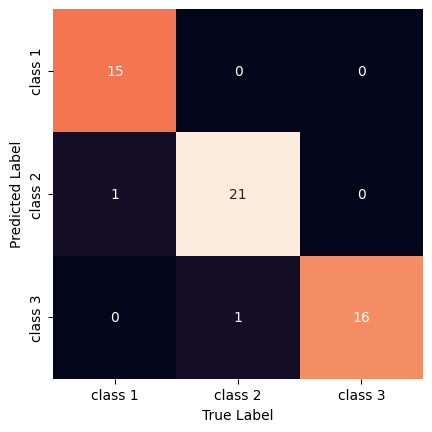

In [27]:
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= ["class 1", "class 2", "class 3"], yticklabels= ["class 1", "class 2", "class 3"])
plt.xlabel('True Label')
plt.ylabel('Predicted Label');


- (1,1): 16 - El modelo predijo correctamente 16 veces la primera clase (clase 1).
- (2,2): 21 - El modelo predijo correctamente 21 veces la segunda clase (clase 2).
- (3,3): 16 - El modelo predijo correctamente 16 veces la tercera clase (clase 3).

- (2,3): 1 - El modelo predijo una vez la segunda clase (clase 2), cuando la etiqueta verdadera era la tercera clase (clase 3). Este es un error del modelo.

El modelo muestra en general un muy buen desempeño. Esto se podrá evidenciar una vez calculemos las métricas para evaluar el rendimiento del modelo, lo que se presentará a continuación:

In [28]:
print(f'precision: {precision_score(labels, y_test, average="macro")}')
print(f'recall: {recall_score(labels, y_test, average="macro")}')
print(f'accuracy: {accuracy_score(labels, y_test)}')
print(f'f1 score: {f1_score(labels, y_test, average="macro")}')


precision: 0.9640151515151515
recall: 0.9652406417112299
accuracy: 0.9629629629629629
f1 score: 0.9639947865754318


##### **Conclusión**

 El modelo tiene una alta precisión, lo que significa que casi todas las predicciones positivas fueron correctas, y un buen recall, lo que indica que identificó correctamente la mayoría de las instancias positivas.

 Al observar los resultados de las 4 métricas, podemos concluir que se presenta un modelo con un gran desempeño y es confiable para lo que fue entrenado. Es por esto que no es necsario realizar ajustes o fine-tuning al modelo.